# Setup and Library Imports

In [ ]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("mediapipe")
install("opencv-python")
install("matplotlib")

# Import required libraries
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab import files
from contextlib import redirect_stdout
import os
import io

# Image Upload and Display


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print(" Please upload one or more hand images (JPG/PNG)...")
uploaded = files.upload()

if not uploaded:
    print("No files uploaded.")
else:
    # Load and store images
    image_dict = {}
    for filename in uploaded.keys():
        image = cv2.imread(filename)
        if image is not None:
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_dict[filename] = rgb_image
        else:
            print(f"  Could not load image: {filename}")

# Make available for next cell
if 'image_dict' in locals():
    globals()['image_dict'] = image_dict

 Please upload one or more hand images (JPG/PNG)...


Saving images.jpeg to images (7).jpeg
Saving Paume_de_main.jpeg to Paume_de_main (8).jpeg
Saving pngtree-human-hand-holding-thumb-palm-photo-image_27820422.jpg to pngtree-human-hand-holding-thumb-palm-photo-image_27820422 (9).jpg
Saving pngtree-mens-palm-with-fingers-spread-joy-beauty-anatomy-photo-image_5166884.jpg to pngtree-mens-palm-with-fingers-spread-joy-beauty-anatomy-photo-image_5166884 (8).jpg


# Hand Landmark Detection and Validation Logic

In [ ]:
import mediapipe as mp

if 'image_dict' not in globals():
    print(" Please run the 'Upload Images' cell first.")
else:
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils

    # Process all images and draw landmarks
    annotated_images = []

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=1,
        min_detection_confidence=0.5
    ) as hands:
        for rgb_image in image_dict.values():
            results = hands.process(rgb_image)

            if not results.multi_hand_landmarks:
                # Keep original if no hand detected
                annotated_images.append(rgb_image)
            else:
                # Draw landmarks: green lines, red dots
                annotated_image = rgb_image.copy()
                mp_drawing.draw_landmarks(
                    annotated_image,
                    results.multi_hand_landmarks[0],
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=3),
                    mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
                )
                annotated_images.append(annotated_image)

    # Make available globally
    globals()['annotated_images'] = annotated_images

# Final Validation Report and Suggestions

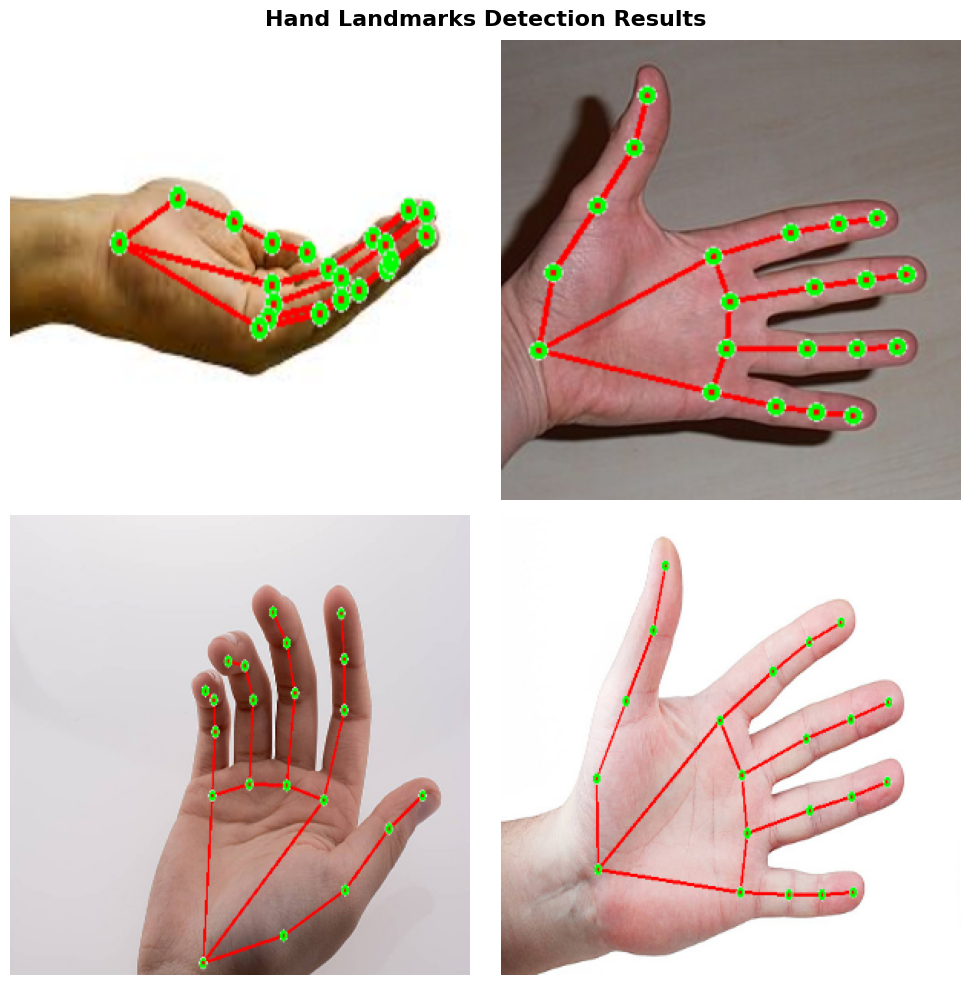

In [ ]:
if 'annotated_images' not in globals():
    print("Please run the processing cell first.")
else:
    n = min(4, len(annotated_images))
    resized_images = []

    for img in annotated_images[:n]:
        resized = cv2.resize(img, (300, 300))
        resized_images.append(resized)

    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(2, 2, i + 1)
        plt.imshow(resized_images[i])
        plt.axis("off")

    plt.suptitle("Hand Landmarks Detection Results", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
